In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('./data/cotton/PCOTTINDUSDM.csv', parse_dates = True, index_col='DATE').round(2)
data.head()

,PCOTTINDUSDM
DATE,
1990-01-01,75.20
1990-02-01,75.96
1990-03-01,78.90
1990-04-01,82.87
1990-05-01,85.60


In [3]:
data.tail()

,PCOTTINDUSDM
DATE,
2024-06-01,83.24
2024-07-01,81.38
2024-08-01,79.93
2024-09-01,82.56
2024-10-01,83.69


<Axes: xlabel='DATE'>

<Figure size 1200x1000 with 0 Axes>

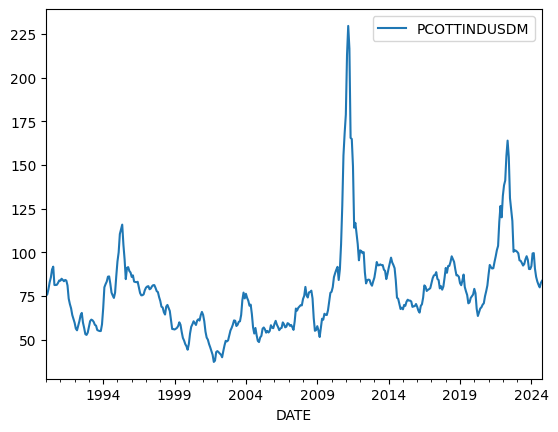

In [4]:
plt.figure(figsize=(12,10))
data.plot(kind='line')